In [189]:
import pandas
import csv
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from datetime import datetime
from collections import defaultdict

   # Loading and separating Dataframes
   Loading separate DFs to ensure data is kept separate when exploring

In [2]:
superstore_df = pandas.read_csv('superstore.csv')
superstore_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,US-2019-103800,2019/01/03,2019/01/07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,...,77095,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512
1,2,US-2019-112326,2019/01/04,2019/01/08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870
2,3,US-2019-112326,2019/01/04,2019/01/08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717
3,4,US-2019-112326,2019/01/04,2019/01/08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748
4,5,US-2019-141817,2019/01/05,2019/01/12,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,...,19143,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840


In [3]:
discount_products = superstore_df[superstore_df.Discount != 0]
non_discount_products = superstore_df[superstore_df.Discount == 0]
ordered_discount_products = discount_products.sort_values('Discount', ascending=False)

In [4]:
ordered_discount_products = discount_products.sort_values('Discount', ascending=False)

In [5]:
discount_products.sort_values('Discount').head(50)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2189,2190,US-2020-109512,2020/03/05,2020/03/05,Same Day,LF-17185,Luke Foster,Consumer,United States,New York City,...,10011,East,FUR-CH-10001146,Furniture,Chairs,"Global Value Mid-Back Manager's Chair, Gray",383.607,7,0.1,63.9345
1910,1911,US-2019-163412,2019/12/20,2019/12/23,Second Class,SM-20950,Suzanne McNair,Corporate,United States,New York City,...,10035,East,FUR-CH-10004875,Furniture,Chairs,Harbour Creations 67200 Series Stacking Chairs,192.186,3,0.1,36.3018
31950,31951,CA-2018-142734,2018/04/16,2018/04/21,Standard Class,DM-13345,Denise Monton,Corporate,United States,New York City,...,10024,East,FUR-CH-10003968,Furniture,Chairs,Novimex Turbo Task Chair,127.764,2,0.1,2.8392
25931,25932,US-2023-120355,2023/09/18,2023/09/25,Standard Class,MM-17260,Magdelene Morse,Consumer,United States,New Rochelle,...,10801,East,FUR-CH-10001394,Furniture,Chairs,Global Leather Executive Chair,631.782,2,0.1,140.3960
23393,23394,US-2022-126977,2022/09/17,2022/09/23,Standard Class,PF-19120,Peter Fuller,Consumer,United States,New York City,...,10035,East,FUR-CH-10001973,Furniture,Chairs,Office Star Flex Back Scooter Chair with White...,199.764,2,0.1,8.8784
31957,31958,CA-2018-136805,2018/05/23,2018/05/27,Second Class,NM-18445,Nathan Mautz,Home Office,United States,Detroit,...,48234,Central,OFF-AP-10001394,Office Supplies,Appliances,Harmony Air Purifier,850.500,5,0.1,245.7000
2390,2391,US-2020-142734,2020/04/16,2020/04/21,Standard Class,DM-13345,Denise Monton,Corporate,United States,New York City,...,10024,East,FUR-CH-10003968,Furniture,Chairs,Novimex Turbo Task Chair,127.764,2,0.1,2.8392
16321,16322,CA-2016-124100,2016/03/31,2016/04/06,Standard Class,EH-13990,Erica Hackney,Consumer,United States,New York City,...,10009,East,FUR-CH-10003817,Furniture,Chairs,"Global Value Steno Chair, Gray",327.996,6,0.1,54.6660
19513,19514,US-2017-108343,2017/07/20,2017/07/25,Standard Class,AR-10825,Anthony Rawles,Corporate,United States,New York City,...,10009,East,FUR-CH-10002780,Furniture,Chairs,Office Star - Task Chair with Contemporary Loo...,163.764,2,0.1,25.4744
14475,14476,CA-2014-166989,2014/11/14,2014/11/18,Standard Class,RM-19675,Robert Marley,Home Office,United States,New York City,...,10011,East,FUR-CH-10001797,Furniture,Chairs,"Safco Chair Connectors, 6/Carton",69.264,2,0.1,14.6224


# A couple of exploratory techniques to find trends

In [6]:
profit_discount_products = sum([profit for profit in discount_products["Profit"]])

In [7]:
profit_non_discount_products = sum([profit for profit in non_discount_products["Profit"]]) # list comprehensions to tell what profits are being made

In [8]:
print(f'Discount profit: {profit_discount_products:.2f} \n Non Discount profit: {profit_non_discount_products:.2f}')

Discount profit: -110686.28 
 Non Discount profit: 1043295.53


No useful data to work with for straight profit

In [10]:
discount_list = list(set(discount_products["Discount"]))

In [11]:
sorted_discount_list = sorted(discount_list)
sorted_discount_list

[0.1, 0.15, 0.2, 0.3, 0.32, 0.4, 0.45, 0.5, 0.6, 0.7, 0.8]

In [12]:
list_dfs = [str(disc) for disc in sorted_discount_list]
for i in range(len(list_dfs)):
    list_dfs[i] = superstore_df[superstore_df.Discount == sorted_discount_list[i]]

In [14]:
df_profits = superstore_df[["Discount", "Profit", "Quantity"]]
sum_df = df_profits.groupby("Discount").sum()

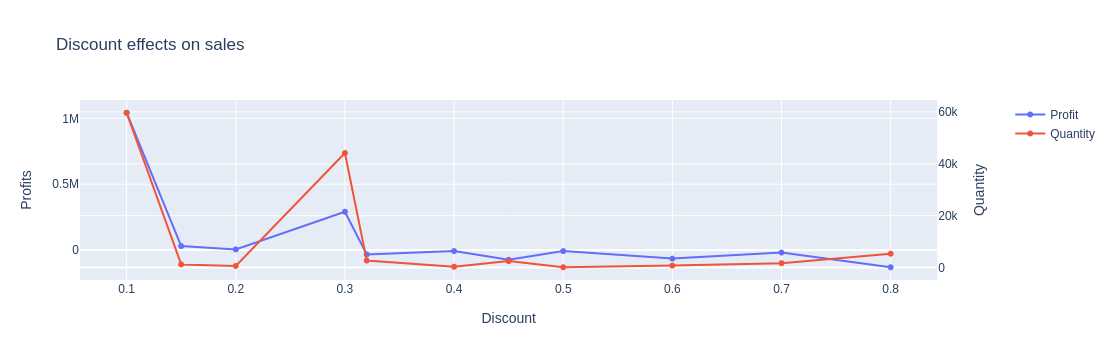

In [18]:
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(
    go.Scatter(x=sorted_discount_list, y=sum_df['Profit'], name="Profit"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=sorted_discount_list, y=sum_df['Quantity'], name="Quantity"),
    secondary_y=True,
)
# Add figure title
fig.update_layout(
    title_text="Discount effects on sales"
)

# Set x-axis title
fig.update_xaxes(title_text="Discount")

# Set y-axes titles
fig.update_yaxes(title_text="Profits", secondary_y=False)
fig.update_yaxes(title_text="Quantity", secondary_y=True)
fig.show()

In [77]:
product_df = superstore_df.sort_values('Product Name')

In [161]:
words_dict = {0: {"before": 0, "during": 0, "after": 0}, 0.15: {"before": 0, "during": 0, "after": 0}, 0.2: {"before": 0, "during": 0, "after": 0}}
def calc_qtty(prod_name):
    before = 0
    during = 0
    after = 0
    filtered_df = product_df[product_df['Product Name'] == prod_name]
    if filtered_df['Discount'].to_list()[0] == 0:
        found = False
        date_in = False
        first_date = filtered_df['Order Date'].to_list()[0]
        final_date = filtered_df['Order Date'].to_list()[-1]
        for i in range(len(filtered_df['Order Date'])):
            if filtered_df['Discount'].to_list()[i] != 0:
                key = filtered_df['Discount'].to_list()[i]
                found = True
                date_found = filtered_df['Order Date'].to_list()[i]
                during += filtered_df['Quantity'].to_list()[i]
                continue
            else:
                if not found:
                    before += filtered_df['Quantity'].to_list()[i]
                else:
                    # print("Success")
                    if not date_in:
                        date_no_disc = filtered_df['Order Date'].to_list()[i]
                        date_in = True
                    after += filtered_df['Quantity'].to_list()[i]
        # try:
        # print(after)
        try:
            d1 = datetime.strptime(first_date, "%Y/%m/%d")
            d2 = datetime.strptime(date_found, "%Y/%m/%d")
            d3 = datetime.strptime(date_no_disc, "%Y/%m/%d")
            d4 = datetime.strptime(final_date, "%Y/%m/%d")
        # print((d3-d4).days, d3, d4)
            disc_dict[key]["before"] +=  before / abs(d1-d2).days * 30
            disc_dict[key]["during"] +=  during / abs(d2-d3).days * 30
            disc_dict[key]["after"] +=  after / abs(d3-d4).days * 30
        except:
            None

In [157]:
disc_dict = {0.1: {"before": 0, "during": 0, "after": 0}, 0.15: {"before": 0, "during": 0, "after": 0}, 0.2: {"before": 0, "during": 0, "after": 0}
             , 0.3: {"before": 0, "during": 0, "after": 0}, 0.32: {"before": 0, "during": 0, "after": 0}, 0.4: {"before": 0, "during": 0, "after": 0}, 0.45 : {"before": 0, "during": 0, "after": 0}, 0.5: {"before": 0, "during": 0, "after": 0}, 0.6: {"before": 0, "during": 0, "after": 0}, 
             0.7: {"before": 0, "during": 0, "after": 0}, 0.8: {"before": 0, "during": 0, "after": 0}}

In [162]:
for product_name in list(set(product_df['Product Name'].to_list())):
    calc_qtty(product_name)

# Quantity of sales before and after discount

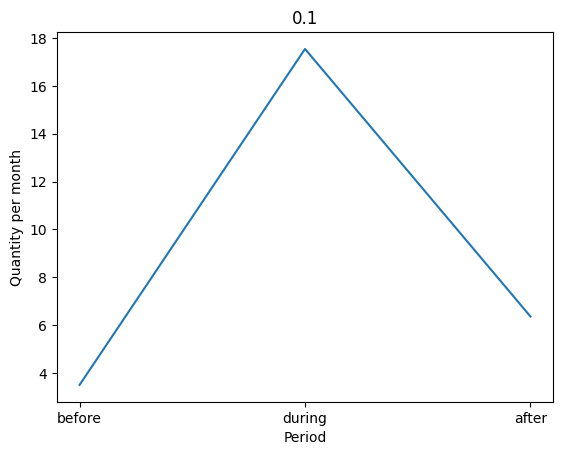

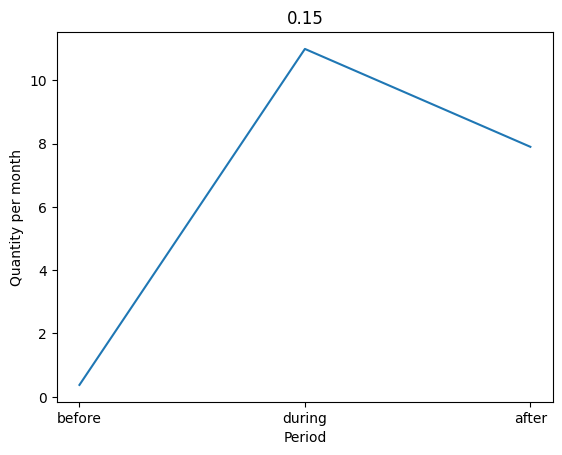

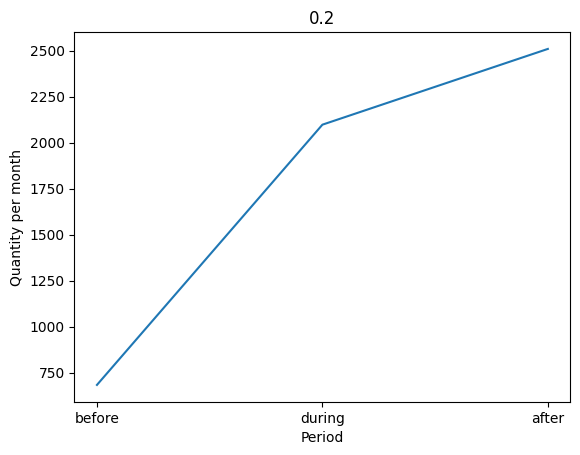

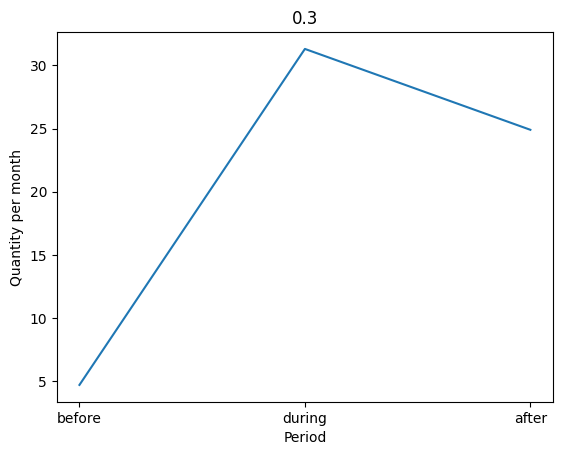

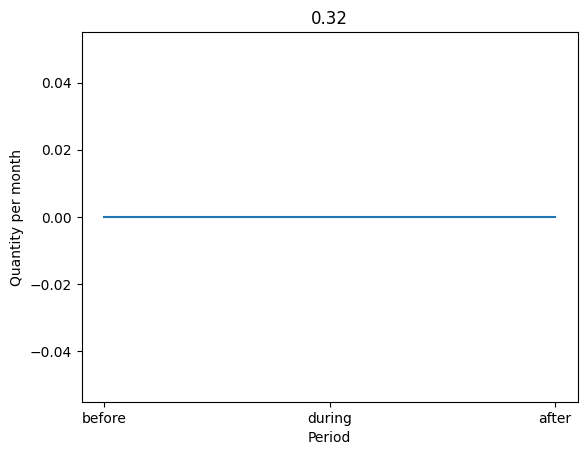

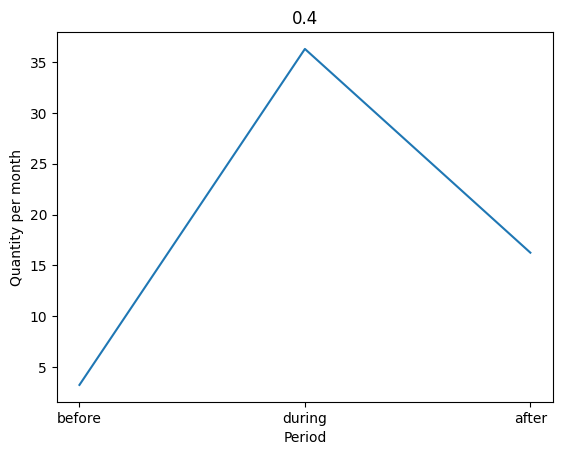

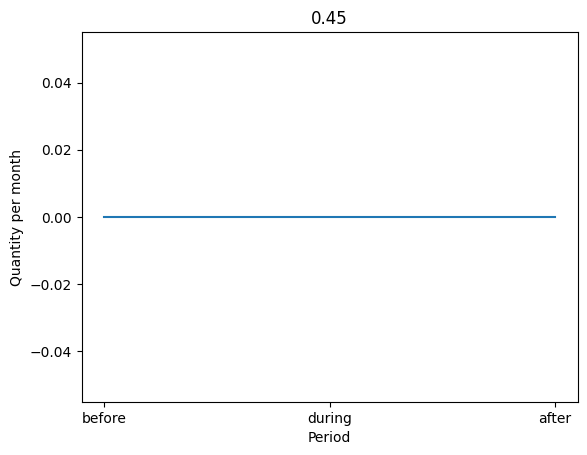

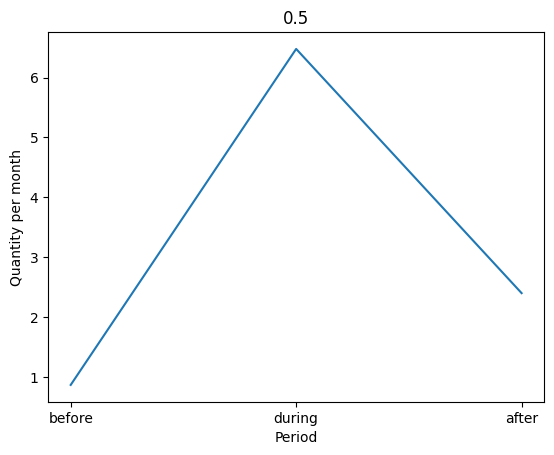

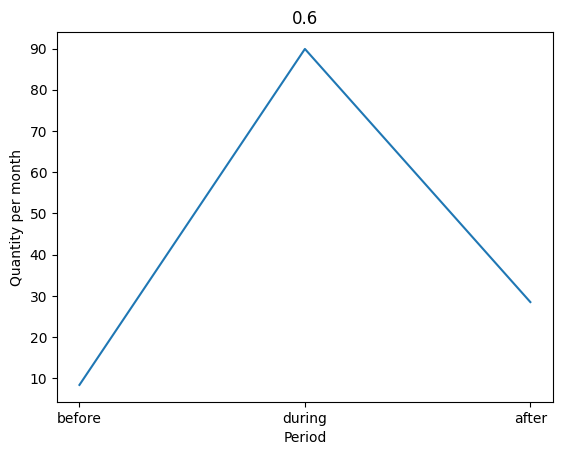

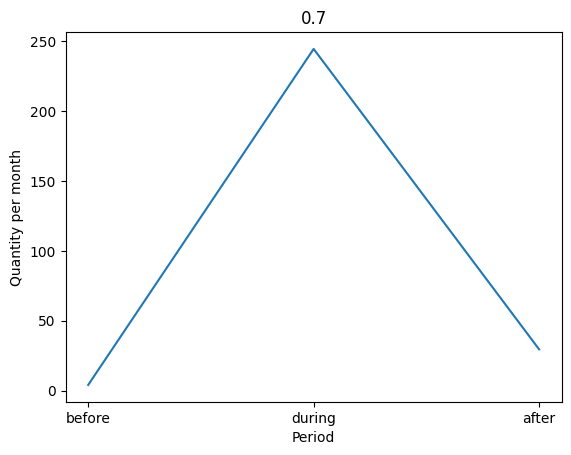

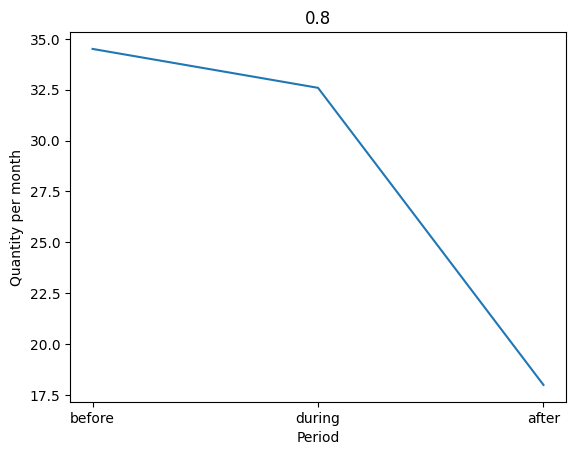

In [204]:
for key in sorted(disc_dict.keys()):
    plt.plot(list(disc_dict[key].keys()), list(disc_dict[key].values()))
    plt.xlabel("Period")
    plt.ylabel("Quantity per month")
    plt.title(f"{key}")
    plt.show()

In [179]:
next_df = product_df.groupby("Sub-Category").sum()

In [182]:
next_df["Quantity"]

Sub-Category
Accessories     9563
Appliances      5594
Art             9792
Binders        19331
Bookcases       2866
Chairs          7746
Copiers          781
Envelopes       2971
Fasteners       3050
Furnishings    11931
Labels          4483
Machines        1418
Paper          16679
Phones         10700
Storage        10195
Supplies        2062
Tables          3998
Name: Quantity, dtype: int64

In [184]:
next_df["Quantity"] = next_df["Quantity"] / next_df["Quantity"].sum()

In [185]:
next_df["Quantity"]

Sub-Category
Accessories    0.077647
Appliances     0.045421
Art            0.079506
Binders        0.156958
Bookcases      0.023271
Chairs         0.062894
Copiers        0.006341
Envelopes      0.024123
Fasteners      0.024765
Furnishings    0.096874
Labels         0.036400
Machines       0.011513
Paper          0.135425
Phones         0.086879
Storage        0.082778
Supplies       0.016742
Tables         0.032462
Name: Quantity, dtype: float64

In [202]:
final_ratio = defaultdict()
for key, value in disc_dict.items():
    try:
        final_ratio[key] = [tuple(value.values())[0] / tuple(value.values())[1], tuple(value.values())[1] / tuple(value.values())[2]]
    except:
        continue

In [203]:
final_ratio

defaultdict(None,
            {0.1: [0.1991130841664644, 2.761161236073272],
             0.15: [0.03414187408512851, 1.3915624426842188],
             0.2: [0.3257014497661441, 0.8359110562202857],
             0.3: [0.1500582499440868, 1.2571997373471815],
             0.4: [0.08944921630798547, 2.233046970684011],
             0.5: [0.13499720158034184, 2.6931411907734293],
             0.6: [0.09346167982578461, 3.1549343351963093],
             0.7: [0.01669812384575689, 8.273316437677098],
             0.8: [1.058678230542754, 1.8118206265884698]})